In [1]:
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
import matplotlib
import powerlaw


matplotlib.rcParams['figure.figsize'] = (15.0, 10.0) # default plots are app. same size as notebook
plt.style.use('ggplot')

In [2]:
import warnings

# Ignore two specific warning messages from the powerlaw package. 
# Comment these lines to show warnings
warnings.filterwarnings("ignore", message="invalid value encountered in true_divide")
warnings.filterwarnings("ignore", message="divide by zero encountered in true_divide")

In [3]:
filepath = "/home/laal/MAG/DATA/NETWORKS/SimpleWeightPsychology2010CentralityGendered.csv"
cent_df = pd.read_csv(filepath, sep="\t")
cent_df.head()

,AuthorId,PageRank,PageRank05,InDegreeStrength,InDegree,OutDegreeStrength,OutDegree,Gender,Rank
0,599318,1.484002e-07,2.958094e-07,0.0,0.0,0.111111,0.111111,1,16691
1,679298,1.484002e-07,2.958094e-07,0.0,0.0,0.333333,0.333333,-1,16101
2,725175,1.508001e-07,2.982382e-07,0.5,4.0,0.000000,0.000000,-1,18818
3,1258017,9.238257e-07,7.202014e-07,27.0,55.0,10.000000,10.000000,1,17764
4,1281797,1.484002e-07,2.958094e-07,0.0,0.0,2.500000,2.500000,1,21135


In [110]:
fitoutput_indegree = powerlaw.Fit(cent_df['InDegree'].values)
fitoutput_indstrength = powerlaw.Fit(cent_df['InDegreeStrength'].values)

Values less than or equal to 0 in data. Throwing out 0 or negative values
Calculating best minimal value for power law fit


KeyboardInterrupt: 

In [ ]:
def plot_ccdf_with_fits(fitoutput, title="CCDF"):
    """
    Plots complement of a cumulative distribution (CCDF) from the output of a 
    degree distribution fitted using the powerlaw package
        @fitoutput: Output of powerlaw.Fit() to the degree distribution of a network 
    """
    plt.figure()
    fig1 = fitoutput.plot_ccdf(label='CCDF', linestyle='--', marker='o')
    
    # add fitted powerlaw, exponential and lognormal CCDF plots as dashed lines
    fitoutput.power_law.plot_ccdf(ax=fig1, color='r', linestyle='--', label='power-law fit')
    fitoutput.exponential.plot_ccdf(ax=fig1, color='g', linestyle='--', label='exponential fit')
    fitoutput.lognormal.plot_ccdf(ax=fig1, color='b', linestyle='--', label='lognormal fit')
    fitoutput.truncated_power_law.plot_ccdf(ax=fig1, color='k', linestyle='--', label='Powerlaw w. exp. cutoff')

    plt.title(title)
    plt.legend()
    plt.ylim(0.001, 1.2)
    plt.xlabel('$x$')
    plt.ylabel('$P(k>=x)$')
    plt.show()

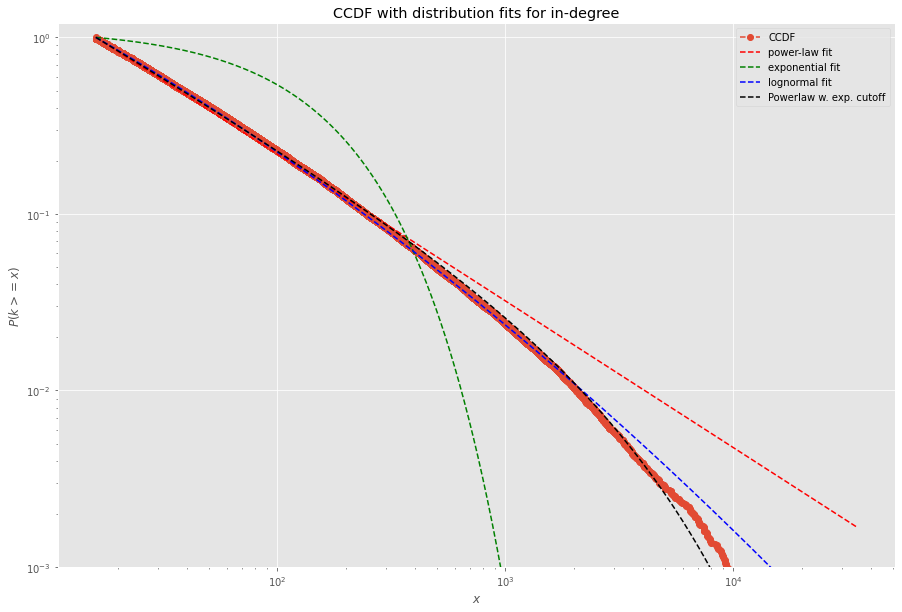

In [85]:
plot_ccdf_with_fits(fitoutput_indstrength, "CCDF with distribution fits for in-degree")

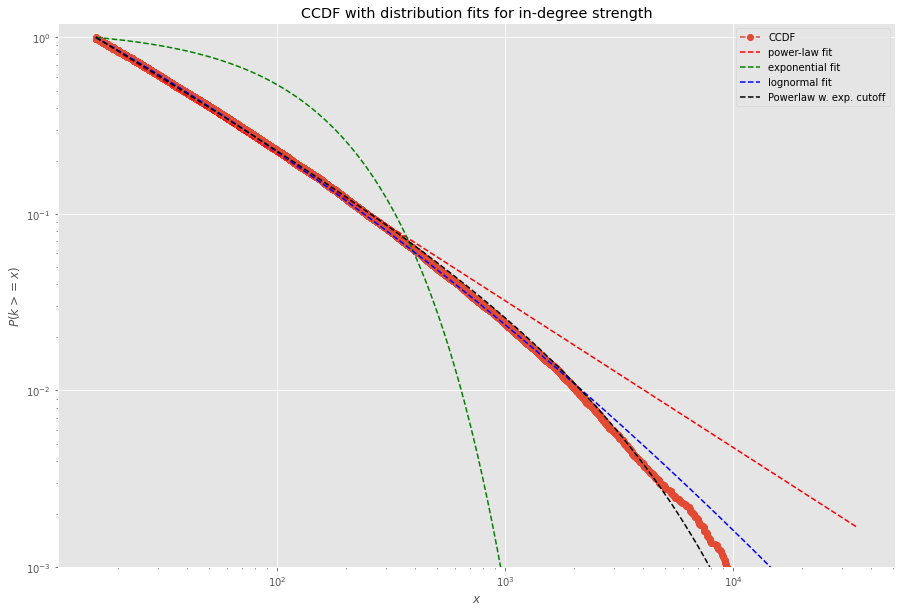

In [86]:
plot_ccdf_with_fits(fitoutput_indstrength, "CCDF with distribution fits for in-degree strength")

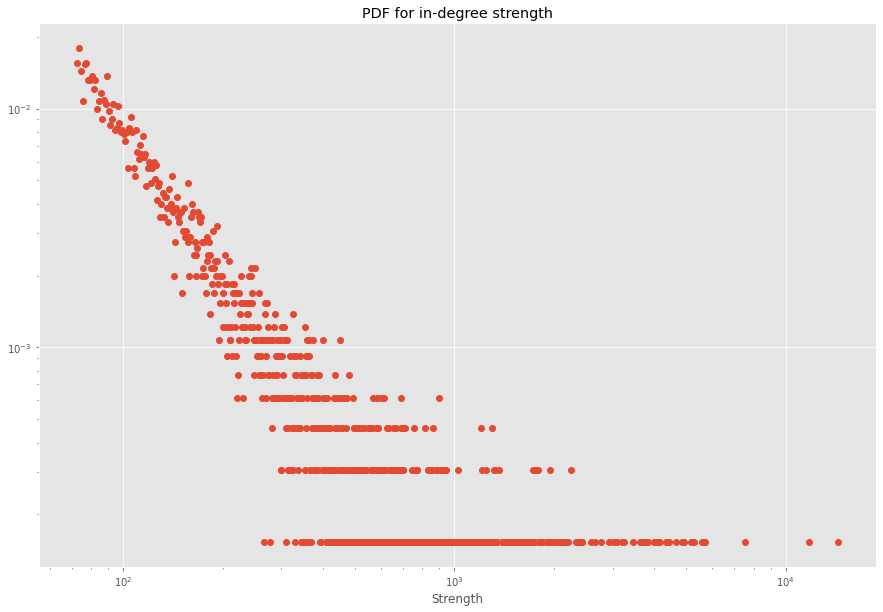

In [19]:
plt.figure()
fitoutput_indstrength.plot_pdf(marker='o', linewidth=0, linear_bins=True)
plt.title("PDF for in-degree strength")
plt.xlabel("Strength")
plt.show()

## Fairness

In [47]:
def plot_group_dist(centrality_df, centrality, interval_size, max_N, protected_group, unprotected, 
                   show_unknown=True):
    sorted_df = centrality_df.sort_values(by=centrality, ascending=False)
    
    global_rate_protected = sorted_df.Gender.value_counts(normalize=True)[protected_group]
    global_rate_unprotected = sorted_df.Gender.value_counts(normalize=True)[unprotected]
    global_rate_unknown = sorted_df.Gender.value_counts(normalize=True)[-1]
    
    
    xticks = []
    y_values = []
    y_values_unprotected = []
    y_values_unknown = []
    
    for N in range(interval_size, max_N, interval_size):
        
        xticks.append(N)
        top_n_df = sorted_df[:N]
        y_values.append(top_n_df.Gender.value_counts(normalize=True)[protected_group])
        y_values_unprotected.append(top_n_df.Gender.value_counts(normalize=True)[unprotected])
        y_values_unknown.append(top_n_df.Gender.value_counts(normalize=True)[-1])
    
    plt.figure()
    
    
    plt.plot(xticks, y_values, '-o', label="Female", markersize=6, color="#6fc9f2")
    plt.axhline(y=global_rate_protected, label="Global proportion female", linestyle='--', alpha=0.8, color="#6fc9f2")
    
    
    plt.plot(xticks, y_values_unprotected, '-o', label="Male", markersize=6, color="#bd8aff")
    plt.axhline(y=global_rate_unprotected, label="Global proportion male", linestyle='--', alpha=0.8, color="#bd8aff")
    
    if show_unknown:
        plt.plot(xticks, y_values_unknown, '-o', label="N/A", markersize=6, color="#817f82")
        plt.axhline(y=global_rate_unknown, label="Global proportion N/A", linestyle='--', alpha=0.8, color="#817f82")
    
    plt.title("Proportion in top N according to {}".format(centrality))
    plt.ylabel("Proportion")
    plt.xlabel("Top N")
    
    plt.legend()
    
    plt.show()
    
    return y_values, xticks
    

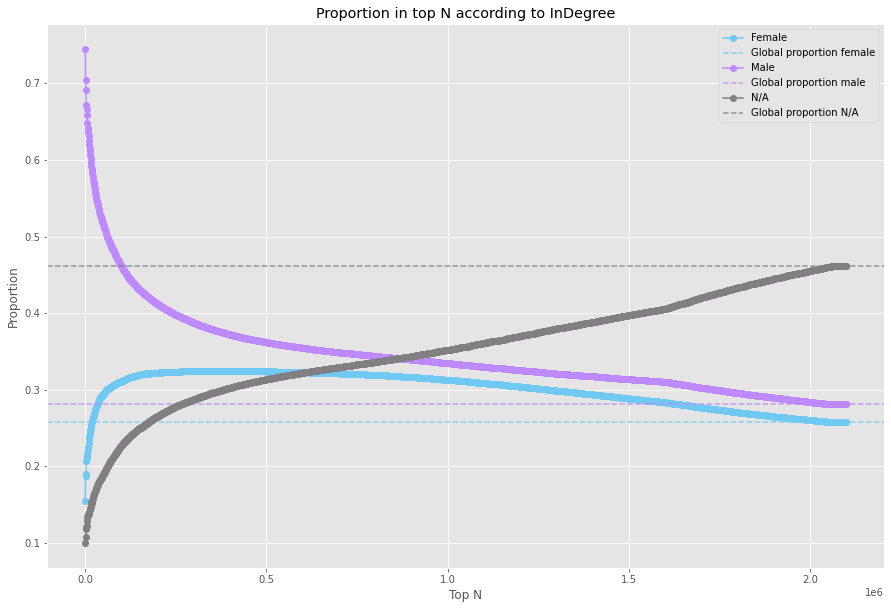

In [48]:
y, x = plot_group_dist(cent_df, 'InDegree', interval_size=1000, max_N=2100000, protected_group=0, unprotected=1)

In [29]:
cent_df_filtered = cent_df.query("Gender != -1")

In [107]:
cent_df_filtered['RankNeg'] = cent_df_filtered['Rank'] * -1

<ipython-input-107-22cefe0a566d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cent_df_filtered['RankNeg'] = cent_df_filtered['Rank'] * -1


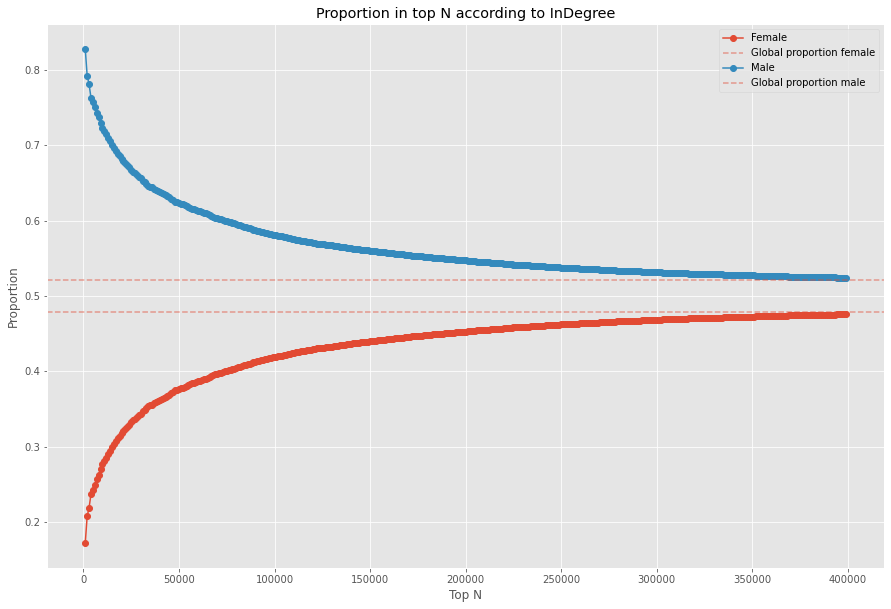

In [30]:
y,x = plot_group_dist(cent_df_filtered, 'InDegree', interval_size=1000, max_N=400000, protected_group=0, unprotected=1)

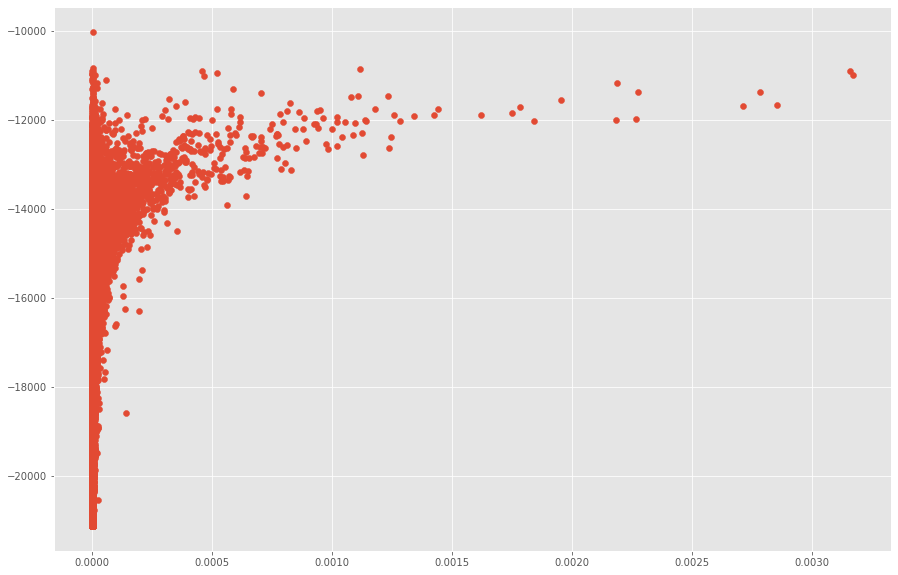

In [99]:
plt.scatter(cent_df_filtered['PageRank'], cent_df_filtered['Rank']*-1)

<AxesSubplot:ylabel='Frequency'>

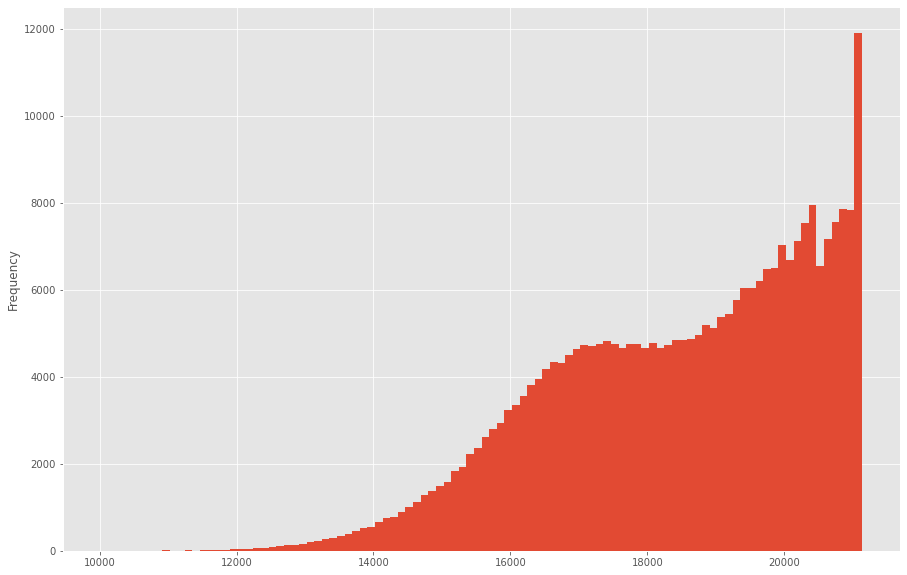

In [101]:
cent_df_filtered['Rank'].plot(kind='hist', bins=100)

<AxesSubplot:ylabel='Frequency'>

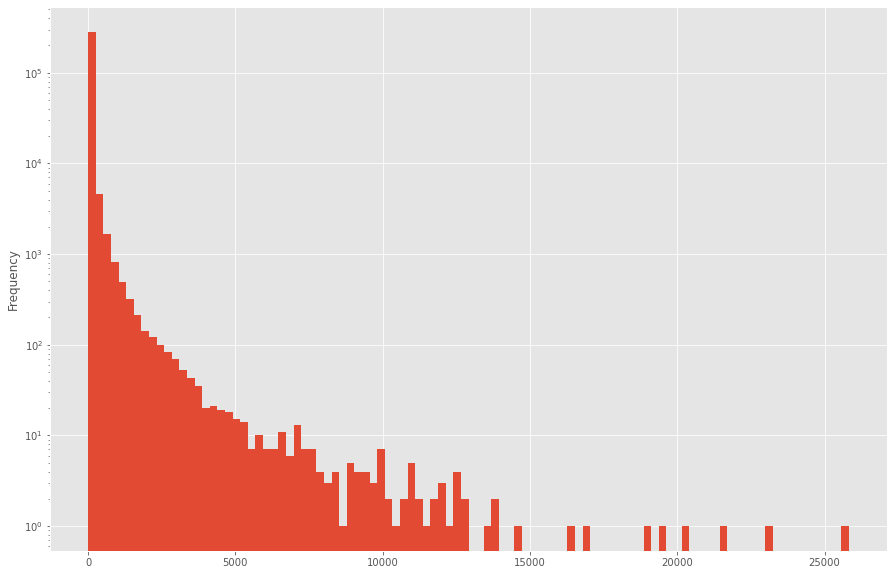

In [105]:
cent_df_filtered['InDegree'].plot(kind='hist', bins=100, log=True)

In [97]:
cent_df_filtered[['PageRank', 'Rank']].corr()

,PageRank,Rank
PageRank,1.000000,-0.162985
Rank,-0.162985,1.000000


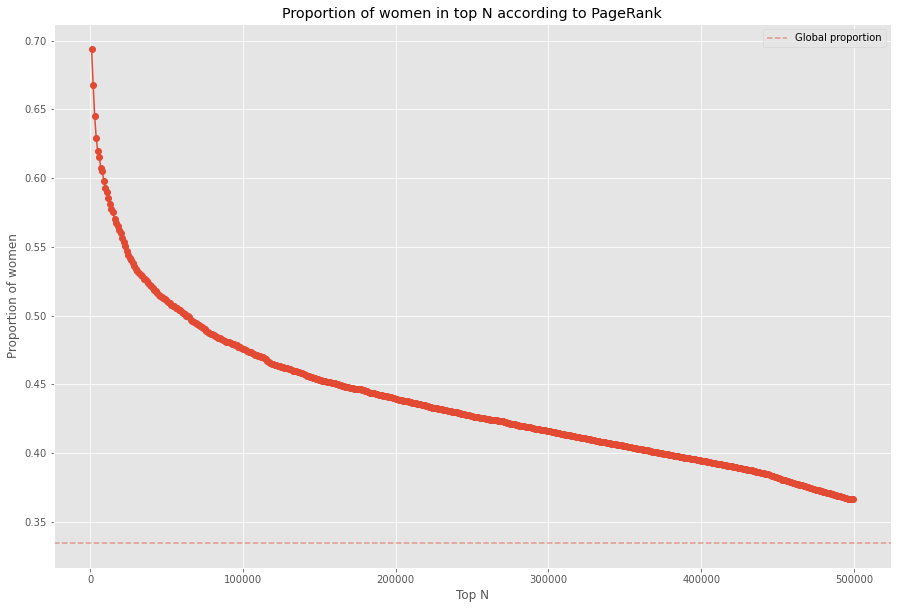

In [55]:
y,x = plot_group_dist(cent_df, 'PageRank', interval_size=1000, max_N=500000, protected_group=1)

In [29]:
cent_df[:11]

,AuthorId,PageRank,PageRank05,InDegreeStrength,InDegree,OutDegreeStrength,OutDegree,Gender,Rank
0,29087,7.099961e-07,0.000001,1.000000,1.0,0.000000,0.000000,-1,19035
1,599318,1.577505e-06,0.000002,1.000000,3.0,1.333333,1.333333,1,16691
2,869659,7.109015e-07,0.000001,0.600000,4.0,0.000000,0.000000,0,20475
3,1671721,1.130131e-05,0.000008,70.833336,199.0,35.166668,35.166668,0,12736
4,2069880,9.996813e-07,0.000001,1.375000,13.0,0.500000,0.500000,-1,16284
5,2128505,6.835849e-07,0.000001,0.000000,0.0,7.000000,7.000000,1,16842
6,2755080,6.835849e-07,0.000001,0.000000,0.0,7.500000,7.500000,-1,18157
7,3381675,9.267146e-07,0.000001,1.500000,4.0,1.000000,1.000000,0,18399
8,3546215,6.926638e-07,0.000001,0.500000,1.0,5.000000,5.000000,1,17172
9,3791134,8.106969e-07,0.000001,3.500000,14.0,23.000000,23.000000,1,16825
